In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 15px;
    font-family: Jetbrains Mono;
}

</style>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
indexdf = pd.read_csv('working_data/indexData.csv')
indexdf['Date'] = pd.to_datetime(indexdf['Date'])

In [4]:
indexdf['Index'].unique()

array(['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI',
       'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100'],
      dtype=object)

In [5]:
indexdf[indexdf['Volume'] == indexdf['Volume'].max()];

In [6]:
indexdf['Year'] = indexdf['Date'].dt.year

In [7]:
years = indexdf.groupby(['Year'])['Close'].median()

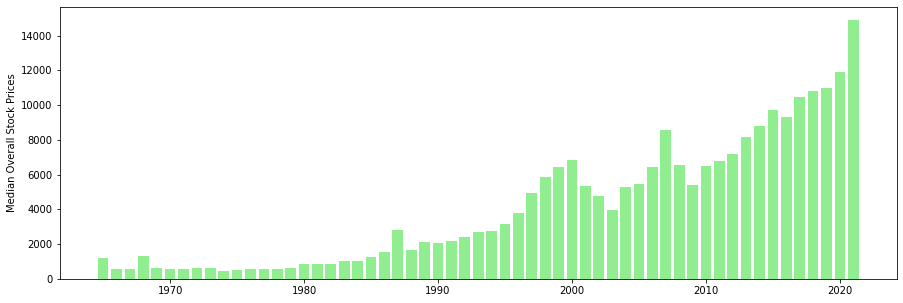

In [8]:
plt.figure(figsize = (15, 5))
plt.bar(years.index, years, color = 'lightgreen')
plt.ylabel('Median Overall Stock Prices')
plt.show()

In [9]:
twth = indexdf[(indexdf['Year'] >= 2000) & (indexdf['Index']).isin(['NYA', 'KS11', 'N100', 'N225', 'SSMI'])];

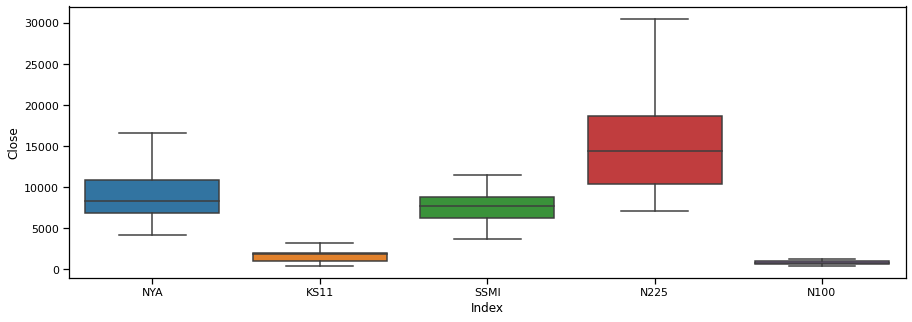

In [10]:
plt.figure(figsize = (15, 5))
sns.set_context('notebook')
sns.boxplot(x = 'Index', y = 'Close', data = twth)
plt.show()


In [11]:
nya = indexdf[(indexdf['Index'] == 'NYA')]

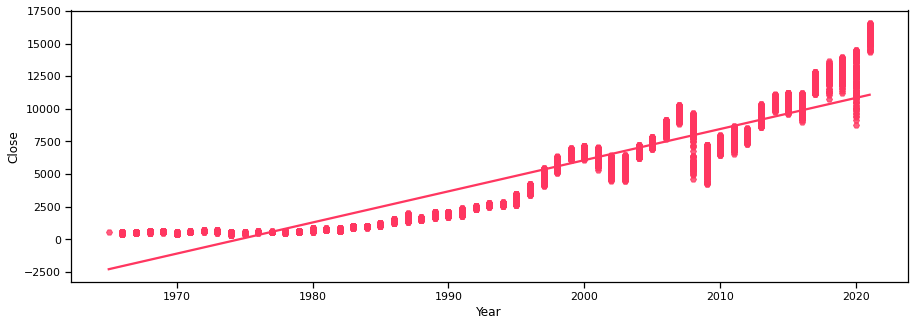

In [12]:
plt.figure(figsize = (15, 5))
sns.set_context('notebook')
sns.regplot(x = 'Year', y = 'Close', data = nya, color = '#FF3660', marker = 'H')
plt.show()

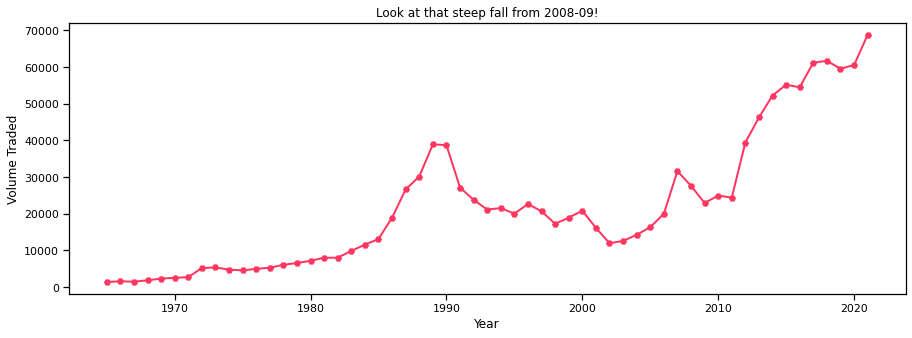

In [14]:
plt.figure(figsize = (15, 5))
indexdf.groupby(['Year'])['Close'].max().plot(color = '#FF3660', linewidth = '2', marker = 'H')
plt.ylabel('Volume Traded')
plt.title('Look at that steep fall from 2008-09!')
plt.show()

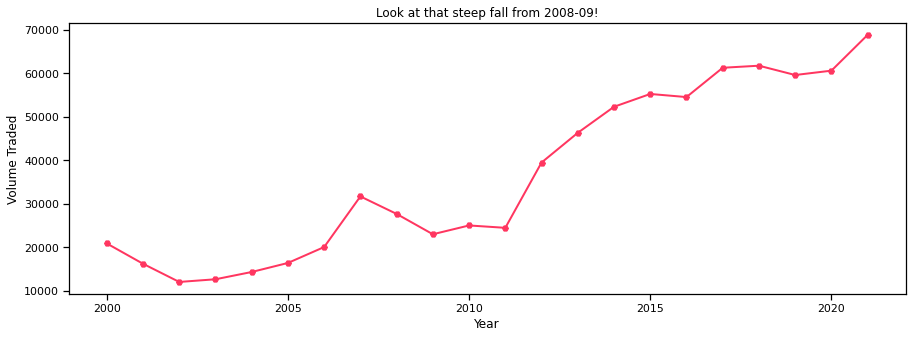

In [16]:
plt.figure(figsize = (15, 5))
indexdf[indexdf['Year'] >= 2000].groupby(['Year'])['Close'].max().plot(color = '#FF3660', linewidth = '2', marker = 'H')
plt.ylabel('Volume Traded')
plt.title('Look at that steep fall from 2008-09!')
plt.show()

In [22]:
print(indexdf[indexdf['Year'] == 2007].groupby('Year')['Close'].median(), indexdf[indexdf['Year'] == 2008].groupby('Year')['Close'].median())

Year
2007    8568.884765
Name: Close, dtype: float64 Year
2008    6543.490234
Name: Close, dtype: float64
